In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson,skellam
import itertools
import warnings
#import sqlalchemy
import numpy as np
import math
#import pyarrow.parquet as pq
#import s3fs
warnings.filterwarnings('ignore')

## import ep data

In [3]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_1617.to_csv('data/epl_1617.csv')
epl_1617 = pd.read_csv('data/epl_1617.csv')
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl_1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HomeTeam   380 non-null    object
 1   AwayTeam   380 non-null    object
 2   HomeGoals  380 non-null    int64 
 3   AwayGoals  380 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.0+ KB


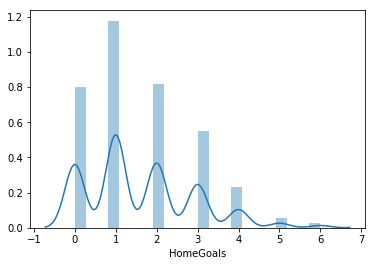

In [28]:
ax = sns.distplot(epl_1617['HomeGoals'])

#### stuff to bet on:

-corners (over/under)
-

## import Jonathan data

In [4]:
jd = pd.read_csv('data/EPL_8_28_19.csv')
pd.set_option('display.max_columns', 500)

In [7]:
colz = jd.columns
for i in jd.columns:
    print(i)
#jd.sort_values(by=['game_week']) 

id
homeID
awayID
season
status
roundID
game_week
revised_game_week
homeGoalCount
awayGoalCount
totalGoalCount
team_a_corners
team_b_corners
totalCornerCount
team_a_offsides
team_b_offsides
team_a_yellow_cards
team_b_yellow_cards
team_a_red_cards
team_b_red_cards
team_a_shotsOnTarget
team_b_shotsOnTarget
team_a_shotsOffTarget
team_b_shotsOffTarget
team_a_shots
team_b_shots
team_a_fouls
team_b_fouls
team_a_possession
team_b_possession
refereeID
coach_a_ID
coach_b_ID
stadium_name
stadium_location
team_a_cards_num
team_b_cards_num
odds_ft_1
odds_ft_x
odds_ft_2
odds_ft_over05
odds_ft_over15
odds_ft_over25
odds_ft_over35
odds_ft_over45
odds_ft_under05
odds_ft_under15
odds_ft_under25
odds_ft_under35
odds_ft_under45
odds_btts_yes
odds_btts_no
odds_team_a_cs_yes
odds_team_a_cs_no
odds_team_b_cs_yes
odds_team_b_cs_no
odds_doublechance_1x
odds_doublechance_12
odds_doublechance_x2
odds_1st_half_result_1
odds_1st_half_result_x
odds_1st_half_result_2
odds_2nd_half_result_1
odds_2nd_half_result_x
odd

# Define Training Set

In [6]:
x = jd.loc[:,["pre_match_home_ppg","pre_match_away_ppg"]]
y_home=jd.loc[:,"team_a_corners"]
y_away=jd.loc[:,"team_b_corners"]


#print(jd.winningTeam.unique())
#print(jd.homeID.unique())

In [7]:
x_home_train,x_home_test,y_home_train,y_home_test=train_test_split(x,y_home,test_size=0.2,random_state=0)
x_away_train,x_away_test,y_away_train,y_away_test=train_test_split(x,y_away,test_size=0.2,random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [8]:


#home goals
def home_train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_home_train,y_home_train,cv=k_fold,scoring="accuracy")),2)
def home_test_acc_score(model):
    return round(accuracy_score(y_home_test, model.predict(x_home_test)),2)
def home_train_prec_score(model):
    return round(precision_score(y_home_train,model.predict(x_home_train),average='macro'),2)
def home_test_prec_score(model):
    return round(precision_score(y_home_test,model.predict(x_home_test),average='macro'),2)
def home_train_f1(model):
    return round(f1_score(y_home_train,model.predict(x_home_train),average='macro'),2)
def home_test_f1(model):
    return round(f1_score(y_home_test,model.predict(x_home_test),average='macro'),2)
def home_confusion_matrix_model_train(model_used):
    cm=confusion_matrix(y_home_train,model_used.predict(x_home_train))
    col=["Predicted Home Goals: 0","Predicted Home Goals: 1","Predicted Home Goals: 2","Predicted Home Goals: 3","Predicted Home Goals: 4","Predicted Home Goals: 5","Predicted Home Goals: 6"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Home Goals: 0","Predicted Home Goals: 1","Predicted Home Goals: 2","Predicted Home Goals: 3","Predicted Home Goals: 4","Predicted Home Goals: 5","Predicted Home Goals: 6"]
    cm.index=["Actual Home Goals: 0","Actual Home Goals: 1","Actual Home Goals: 2","Actual Home Goals: 3","Actual Home Goals: 4","Actual Home Goals: 5","Actual Home Goals: 6"]
    #cm[col]=np(cm[col])
    return cm.T
def home_confusion_matrix_model_test(model_used):
    cm=confusion_matrix(y_home_test,model_used.predict(x_home_test))
    col=["Predicted Home Goals: 0","Predicted Home Goals: 1","Predicted Home Goals: 2","Predicted Home Goals: 3","Predicted Home Goals: 4","Predicted Home Goals: 5","Predicted Home Goals: 6"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Home Goals: 0","Predicted Home Goals: 1","Predicted Home Goals: 2","Predicted Home Goals: 3","Predicted Home Goals: 4","Predicted Home Goals: 5","Predicted Home Goals: 6"]
    cm.index=["Actual Home Goals: 0","Actual Home Goals: 1","Actual Home Goals: 2","Actual Home Goals: 3","Actual Home Goals: 4","Actual Home Goals: 5","Actual Home Goals: 6"]
    #cm[col]=np(cm[col])
    return cm.T
def home_importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_home_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

#away goals
def away_train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_away_train,y_away_train,cv=k_fold,scoring="accuracy")),2)
def away_test_acc_score(model):
    return round(accuracy_score(y_away_test, model.predict(x_away_test)),2)
def away_train_prec_score(model):
    return round(precision_score(y_away_train,model.predict(x_away_train),average='macro'),2)
def away_test_prec_score(model):
    return round(precision_score(y_away_test,model.predict(x_away_test),average='macro'),2)
def away_train_f1(model):
    return round(f1_score(y_away_train,model.predict(x_away_train),average='macro'),2)
def away_test_f1(model):
    return round(f1_score(y_away_test,model.predict(x_away_test),average='macro'),2)
def away_confusion_matrix_model_train(model_used):
    cm=confusion_matrix(y_away_train,model_used.predict(x_away_train))
    col=["Predicted Away Goals: 0","Predicted Away Goals: 1","Predicted Away Goals: 2","Predicted Away Goals: 3","Predicted Away Goals: 4","Predicted Away Goals: 5","Predicted Away Goals: 6"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Away Goals: 0","Predicted Away Goals: 1","Predicted Away Goals: 2","Predicted Away Goals: 3","Predicted Away Goals: 4","Predicted Away Goals: 5","Predicted Away Goals: 6"]
    cm.index=["Actual Away Goals: 0","Actual Away Goals: 1","Actual Away Goals: 2","Actual Away Goals: 3","Actual Away Goals: 4","Actual Away Goals: 5","Actual Away Goals: 6"]
    #cm[col]=np(cm[col])
    return cm.T
def away_confusion_matrix_model_test(model_used):
    cm=confusion_matrix(y_away_test,model_used.predict(x_away_test))
    col=["Predicted Away Goals: 0","Predicted Away Goals: 1","Predicted Away Goals: 2","Predicted Away Goals: 3","Predicted Away Goals: 4","Predicted Away Goals: 5","Predicted Away Goals: 6"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Away Goals: 0","Predicted Away Goals: 1","Predicted Away Goals: 2","Predicted Away Goals: 3","Predicted Away Goals: 4","Predicted Away Goals: 5","Predicted Away Goals: 6"]
    cm.index=["Actual Away Goals: 0","Actual Away Goals: 1","Actual Away Goals: 2","Actual Away Goals: 3","Actual Away Goals: 4","Actual Away Goals: 5","Actual Away Goals: 6"]
    #cm[col]=np(cm[col])
    return cm.T
def away_importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_away_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))



In [9]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
homelog_reg1 = GridSearchCV(LogisticRegression(penalty="l1"),param_grid=param_grid,scoring="f1_macro")
#homelog_reg1=LogisticRegression(penalty="l1")
homelog_reg1.fit(x_home_train,y_home_train)
#predicted=log_reg1.predict(x_test)
print(homelog_reg1.best_params_)
print("In-sample accuracy: " + str(home_train_acc_score(homelog_reg1)))
print("Test accuracy: " + str(home_test_acc_score(homelog_reg1)))
print ("In-sample Precision Score: " + str(home_train_prec_score(homelog_reg1)))
print ("Test Precision Score: " + str(home_test_prec_score(homelog_reg1)))
print ("In-sample F1 Score: " + str(home_train_f1(homelog_reg1)))
print ("Test F1 Score: " + str(home_test_f1(homelog_reg1)))
#home_confusion_matrix_model_train(homelog_reg1)

{'C': 1}
In-sample accuracy: 0.14
Test accuracy: 0.12
In-sample Precision Score: 0.03
Test Precision Score: 0.02
In-sample F1 Score: 0.03
Test F1 Score: 0.03


In [39]:
predicted_home = homelog_reg1.predict(x_home_train)
actual_home = y_home_train

No handles with labels found to put in legend.
No handles with labels found to put in legend.


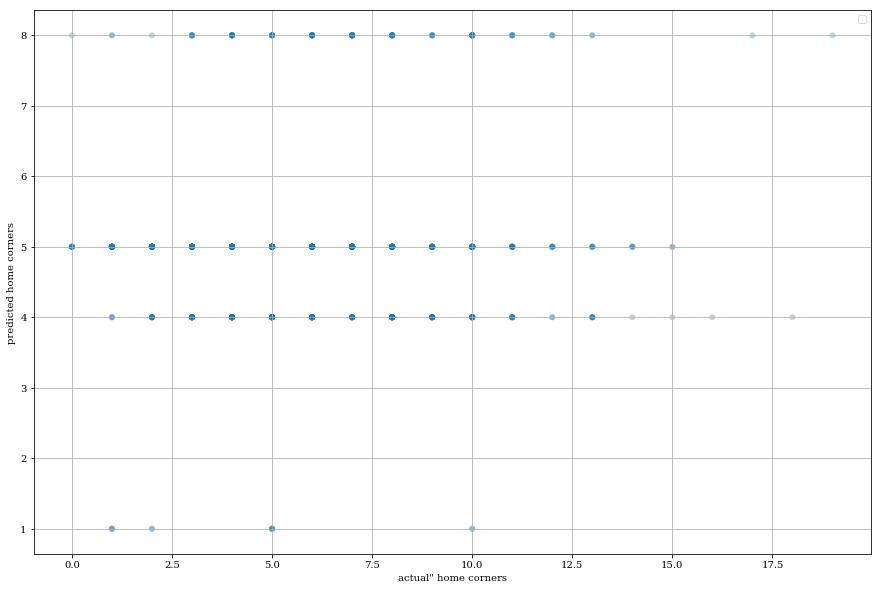

In [42]:
make_scatter(actual_home, predicted_home,'actual" home corners','predicted home corners')
#make_hist(actual_home, predicted_home,'actual home corners','predicted home corners')

In [ ]:
param_grid = dict(C=(0.0001,0.001,0.005,0.01,0.1,0.5,1))
homelog_reg2 = GridSearchCV(LogisticRegression(penalty="l2"),param_grid=param_grid,scoring="f1_macro")
#homelog_reg1=LogisticRegression(penalty="l1")
homelog_reg2.fit(x_home_train,y_home_train)
#predicted=log_reg1.predict(x_test)
print(homelog_reg2.best_params_)
print("In-sample accuracy: " + str(home_train_acc_score(homelog_reg2)))
print("Test accuracy: " + str(home_test_acc_score(homelog_reg2)))
print ("In-sample Precision Score: " + str(home_train_prec_score(homelog_reg2)))
print ("Test Precision Score: " + str(home_test_prec_score(homelog_reg2)))
print ("In-sample F1 Score: " + str(home_train_f1(homelog_reg2)))
print ("Test F1 Score: " + str(home_test_f1(homelog_reg2)))

In [12]:
homesvc_rbf = SVC(kernel='rbf', gamma=0.001, C=1,random_state=0)
homesvc_rbf.fit(x_home_train, y_home_train)
#print(homesvc_rbf.best_params_)
print("In-sample accuracy: " + str(home_train_acc_score(homesvc_rbf)))
print("Test accuracy: " + str(home_test_acc_score(homesvc_rbf)))
print ("In-sample Precision Score: " + str(home_train_prec_score(homesvc_rbf)))
print ("Test Precision Score: " + str(home_test_prec_score(homesvc_rbf)))
print ("In-sample F1 Score: " + str(home_train_f1(homesvc_rbf)))
print ("Test F1 Score: " + str(home_test_f1(homesvc_rbf)))

In-sample accuracy: 0.15
Test accuracy: 0.15
In-sample Precision Score: 0.01
Test Precision Score: 0.01
In-sample F1 Score: 0.01
Test F1 Score: 0.02


In [13]:
homexgclass = xgb.XGBClassifier(max_depth=5, n_estimators=15, learning_rate=0.2)
homexgclass.fit(x_home_train,y_home_train)
predicted=homexgclass.predict(x_home_test)
#print(homexgclass.best_params_)
print("In-sample accuracy: " + str(home_train_acc_score(homexgclass)))
print("Test accuracy: " + str(home_test_acc_score(homexgclass)))
print ("In-sample Precision Score: " + str(home_train_prec_score(homexgclass)))
print ("Test Precision Score: " + str(home_test_prec_score(homexgclass)))
print ("In-sample F1 Score: " + str(home_train_f1(homexgclass)))
print ("Test F1 Score: " + str(home_test_f1(homexgclass)))

In-sample accuracy: 0.09
Test accuracy: 0.09
In-sample Precision Score: 0.38
Test Precision Score: 0.04
In-sample F1 Score: 0.29
Test F1 Score: 0.04


In [10]:
jd[jd.awayID == jd.winningTeam].shape
#home shape: (549, 173)
#away shape: (350, 173)

winning_corners_a = jd[jd.homeID == jd.winningTeam]['team_a_corners']
losing_corners_a = jd[jd.homeID != jd.winningTeam]['team_a_corners']

winning_corners_b = jd[jd.awayID == jd.winningTeam]['team_b_corners']
losing_corners_b = jd[jd.homeID != jd.winningTeam]['team_b_corners']

winning_corners = pd.concat([winning_corners_a,winning_corners_b])
losing_corners = pd.concat([losing_corners_a,losing_corners_b])

In [11]:
team_a_efficiency = jd['team_a_shotsOnTarget']/jd['team_a_possession']
team_b_efficiency = jd['team_b_shotsOnTarget']/jd['team_b_possession']


In [93]:
jd['winningTeam']

0       150
1       154
2       142
3        -1
4        -1
5        -1
6        93
7       149
8       151
9       152
10      149
11       93
12      150
13       92
14      152
15      144
16      145
17       -1
18      147
19      153
20       -1
21      152
22       -1
23      144
24      108
25       -1
26       59
27      149
28       -1
29       93
       ... 
1130     93
1131     59
1132    143
1133    157
1134     -1
1135    151
1136    161
1137     -1
1138     -1
1139    153
1140    151
1141     93
1142     -1
1143    145
1144     -1
1145     -1
1146    209
1147     92
1148     59
1149    149
1150     59
1151    148
1152     -1
1153     -1
1154    144
1155     -1
1156    159
1157    251
1158    151
1159     -1
Name: winningTeam, Length: 1160, dtype: int64

In [12]:
def make_hist(data1,data2,label1,label2):
    plt.rc('font', family='serif')
    f,ax = plt.subplots(figsize=(15,10))
    nbins = 5
#    sns.distplot(data1,bins = nbins, label = label1)
    sns.distplot(data2,bins = nbins, label = label2)
    sns.distplot(data1,bins = nbins, label = label1)
    plt.legend()
    plt.grid()
    #ax.tick_params('x',labelsize=20)
    #plt.title('corners',fontsize=30)
    plt.legend(loc='best',fontsize=10)
    plt.show()

def make_scatter(x,y):
    plt.rc('font', family='serif')
    f,ax = plt.subplots(figsize=(15,10))
    color 
    ax.scatter(x, y, alpha=0.3, edgecolors='none')
    plt.legend()
    plt.grid()
    #ax.tick_params('x',labelsize=20)
    #plt.title('corners',fontsize=30)
    plt.legend(loc='best',fontsize=10)
    plt.show()
    
#make_hist(jd['team_a_corners'],jd['team_b_corners'],'team_a_corners','team_b_corners')
#make_hist(winning_corners,losing_corners,'winning_corners','losing_corners')
#make_hist(winning_corners_a,losing_corners_b,'winningAndHome_corners','losingAndAway_corners')
#make_hist(losing_corners_a,winning_corners_b,'losingAndHome_corners','winningAndAway_corners')
#make_hist(team_a_efficiency.replace([np.inf, -np.inf], np.nan),team_b_efficiency.replace([np.inf, -np.inf], np.nan),'home team shots on tar/ps','away team shots on tar/ps')

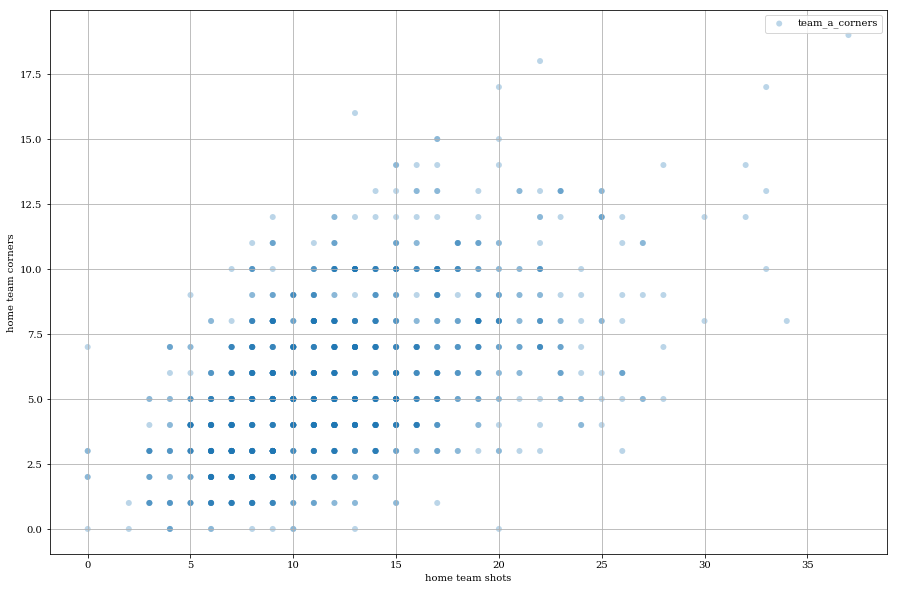

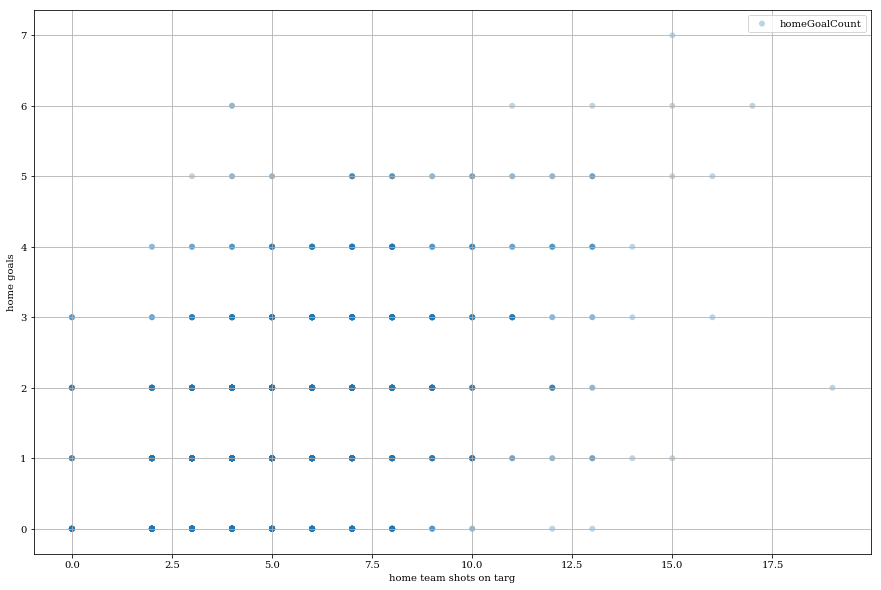

In [39]:
def make_scatter(x,y,xlabel,ylabel):
    plt.rc('font', family='serif')
    f,ax = plt.subplots(figsize=(15,10))
    ax.scatter(x, y, alpha=0.3, edgecolors='none')
    plt.legend()
    plt.grid()
    #ax.tick_params('x',labelsize=20)
    #plt.title('corners',fontsize=30)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend(loc='best',fontsize=10)
    plt.show()
    
#make_scatter(jd.team_a_shots, jd.overallGoalCount,'total corners','total goals')
#make_scatter(jd.team_b_shots, jd.team_b_corners,'away team shots','away team corners')

make_scatter(jd.team_a_shots, jd.team_a_corners,'home team shots','home team corners')
make_scatter(jd.team_a_shotsOnTarget, jd.homeGoalCount,'home team shots on targ','home goals')

#make_scatter(jd.team_b_shots, jd.team_a_corners,'away team shots','home team corners')

#make_scatter(jd.team_a_shots, jd.team_b_shots,'home team shots','away team shots')
#make_scatter(jd.team_a_corners, jd.team_b_corners,'home team corners','away team corners')
#make_scatter(jd.team_a_possession, jd.team_a_corners,'home team pos','home team corners')
#make_scatter(jd.team_b_possession, jd.team_b_corners,'away team pos','away team corners')
#make_scatter(jd.team_a_possession, jd.team_a_shots,'home team pos','home team shots')
#make_scatter(jd.team_b_possession, jd.team_b_shots,'away team pos','away team shots')


## make home away poisson plots

In [14]:
def home_away_plot(epl_1617,home_team,away_team):
    fig,(ax1,ax2) = plt.subplots(2, 1)


    chel_home = epl_1617[epl_1617['home_name']==home_team][['team_a_corners']].apply(pd.value_counts,normalize=True)
    chel_home_pois = [poisson.pmf(i,np.sum(np.multiply(chel_home.values.T,chel_home.index.T),axis=1)[0]) for i in range(15)]
    sun_home = epl_1617[epl_1617['home_name']==away_team][['team_a_corners']].apply(pd.value_counts,normalize=True)
    sun_home_pois = [poisson.pmf(i,np.sum(np.multiply(sun_home.values.T,sun_home.index.T),axis=1)[0]) for i in range(15)]

    chel_away = epl_1617[epl_1617['away_name']==home_team][['team_b_corners']].apply(pd.value_counts,normalize=True)
    chel_away_pois = [poisson.pmf(i,np.sum(np.multiply(chel_away.values.T,chel_away.index.T),axis=1)[0]) for i in range(15)]
    sun_away = epl_1617[epl_1617['away_name']==away_team][['team_b_corners']].apply(pd.value_counts,normalize=True)
    sun_away_pois = [poisson.pmf(i,np.sum(np.multiply(sun_away.values.T,sun_away.index.T),axis=1)[0]) for i in range(15)]

    print(chel_home.index)
    print(chel_home.index-0.4)
    print(chel_home.values)
    ax1.bar(chel_home.index-0.4,np.vectorize(chel_home.values),width=0.4,label=home_team)
    ax1.bar(chel_home.index-0.4,chel_home.values,width=0.4,color="#034694",linewidth=.5,label=home_team)

    ax1.bar(sun_home.index,sun_home.values,width=0.4,color="#EB172B",label=away_team)
    pois1, = ax1.plot([i for i in range(15)], chel_home_pois,linestyle='-', marker='o',label=home_team, color = "#0a7bff")
    pois1, = ax1.plot([i for i in range(15)], sun_home_pois,linestyle='-', marker='o',label=away_team, color = "#ff7c89")
    leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
    leg.set_title("Poisson                 Actual                ", prop = {'size':'14', 'weight':'bold'})
    ax1.set_xlim([-0.5,7.5])
    ax1.set_ylim([-0.01,0.65])
    ax1.set_xticklabels([])
    # mimicing the facet plots in ggplot2 with a bit of a hack
    ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})
    ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})

    ax2.bar(chel_away.index-0.4,chel_away.values,width=0.4,color="#034694",label=home_team)
    ax2.bar(sun_away.index,sun_away.values,width=0.4,color="#EB172B",label=away_team)
    pois1, = ax2.plot([i for i in range(15)], chel_away_pois, linestyle='-', marker='o',label=home_team, color = "#0a7bff")
    pois1, = ax2.plot([i for i in range(15)], sun_away_pois, linestyle='-', marker='o',label=away_team, color = "#ff7c89")
    ax2.set_xlim([-0.5,7.5])
    ax2.set_ylim([-0.01,0.65])
    ax1.set_title("Number of Corners per Match",size=14,fontweight='bold')
    ax2.set_xlabel("Corners per Match",size=13)
    ax2.text(-1.15, 0.9, 'Proportion of Matches', rotation=90, size=13)
    plt.tight_layout()
    plt.show()

## Poison model

In [23]:
def total_match_output(jd,home_team,away_team):
    match_output(jd,home_team,away_team,0)
    try:
        match_output(jd,home_team,away_team,1)
    except:
        print('error')
    try:
        match_output(jd,home_team,away_team,2)
    except:
        print('error')
    

def match_output(jd,home_team,away_team,assume_home_win=0):
    home_win = jd[jd.homeID == jd.winningTeam] # away loses
    home_lose = jd[jd.homeID != jd.winningTeam] #away wins


    ###########
    if assume_home_win == 0:
        print('assumption: none')
        df_to_use = jd
    elif assume_home_win ==1:
        print('assumption: home team win')
        df_to_use = home_win
    elif assume_home_win ==2:
        print('assumption: home team loss')
        df_to_use = home_lose
    
    
    
    
    corner_model_data = pd.concat([df_to_use[['home_name','away_name','team_a_corners']].assign(home=1).rename(
            columns={'home_name':'team', 'away_name':'opponent','team_a_corners':'corners'}),
           df_to_use[['away_name','home_name','team_b_corners']].assign(home=0).rename(
            columns={'away_name':'team', 'home_name':'opponent','team_b_corners':'corners'})])



    poisson_model = smf.glm(formula="corners ~ home + team + opponent", data=corner_model_data, 
                        family=sm.families.Poisson()).fit()
    poisson_model.summary()

    home_corners = poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,'home':1},index=[1])).iloc[0]
    away_corners = poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,'home':0},index=[1])).iloc[0]
    
    
    

    #set plotting features:
    #fig, ax = plt.subplots(figsize=(10,6))
    #ax.grid()
    # construct Poisson  for each mean goals value
    #poisson_fit_df = df_to_use[['team_a_corners','team_b_corners']]
    #poisson_pred = np.column_stack([[poisson.pmf(i, poisson_fit_df.mean()[j]) for i in range(15)] for j in range(2)])

    # plot histogram of actual goals
    #plt.hist(df_to_use[['team_a_corners', 'team_b_corners']].values, range(16), alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

    # add lines for the Poisson distributions
    #pois1, = plt.plot([i-0.5 for i in range(1,16)], poisson_pred[:,0],linestyle='-', marker='o',label="Home", color = '#CD5C5C')
    #pois2, = plt.plot([i-0.5 for i in range(1,16)], poisson_pred[:,1],linestyle='-', marker='o',label="Away", color = '#006400')

    #leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
    #leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

    #plt.xticks([i-0.5 for i in range(1,16)],[i for i in range(16)])
    #plt.xlabel("Corners per Match",size=13)
    #plt.ylabel("Proportion of Matches",size=13)
    #plt.title("Number of corners per Match",size=14,fontweight='bold')
    #plt.ylim([-0.004, 0.4])
    #plt.tight_layout()
    #plt.show()
    #home_away_plot(df_to_use,home_team,away_team)

    df_size = df_to_use[df_to_use['home_name'] == home_team].shape[0]
    try:
        relative_uncert = 100*math.sqrt(df_size)/df_size
    except:
        relative_uncert = 100
    print('approx relative uncertainty: {:.1f}%, df_size: {}'.format(relative_uncert,df_size))
    print('{} corners: {}'.format(home_team,home_corners))
    print('{} corners: {}'.format(away_team,away_corners))
    print('home - away spread: {}\n\n---------'.format(home_corners-away_corners))

## original poisson model

In [27]:
#total_match_output(jd,'AFC Bournemouth','Everton')
#total_match_output(jd,'Liverpool','Newcastle United')
#total_match_output(jd,'Aston Villa','West Ham United')
#total_match_output(jd,'Brighton & Hove Albion','Burnley')
#total_match_output(jd,'Manchester United','Leicester City')
#total_match_output(jd,'Norwich City','Manchester City')
total_match_output(jd,'Sheffield United','Liverpool')
total_match_output(jd,'Tottenham Hotspur','Southampton')
total_match_output(jd,'Leicester City','Newcastle United')
#total_match_output(jd,'Wolverhampton Wanderers','Chelsea')


assumption: none
approx relative uncertainty: 100.0%, df_size: 1
Sheffield United corners: 3.996789014935488
Liverpool corners: 3.682471188623908
home - away spread: 0.31431782631158

---------
assumption: home team win
approx relative uncertainty: 100.0%, df_size: 1
Sheffield United corners: 4.233656639608021
Liverpool corners: 5.3077115472581715
home - away spread: -1.0740549076501509

---------
assumption: home team loss
approx relative uncertainty: 100.0%, df_size: 0
Sheffield United corners: 3.3116697287758385
Liverpool corners: 2.7230108027833606
home - away spread: 0.5886589259924779

---------
assumption: none
approx relative uncertainty: 13.1%, df_size: 58
Tottenham Hotspur corners: 7.108802266516964
Southampton corners: 4.060876671112934
home - away spread: 3.0479255954040303

---------
assumption: home team win
approx relative uncertainty: 15.2%, df_size: 43
Tottenham Hotspur corners: 6.18935981579556
Southampton corners: 4.552074982017083
home - away spread: 1.6372848337784

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

corner_model_data = pd.concat([jd[['home_name','away_name','team_a_corners']].assign(home=1).rename(
            columns={'home_name':'team', 'away_name':'opponent','team_a_corners':'corners'}),
           jd[['away_name','home_name','team_b_corners']].assign(home=0).rename(
            columns={'away_name':'team', 'home_name':'opponent','team_b_corners':'corners'})])

poisson_model = smf.glm(formula="corners ~ home + team + opponent", data=corner_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

#print('norwich corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Norwich City', 'opponent': 'Manchester City','home':1},index=[1])))
#print('Manchester corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Manchester City', 'opponent': 'Norwich City','home':0},index=[1])))
print('norwich corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Liverpool', 'opponent': 'Newcastle United','home':1},index=[1])))
print('Manchester corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Newcastle United', 'opponent': 'Liverpool','home':0},index=[1])))

norwich corners:  1    8.011373
dtype: float64
Manchester corners:  1    2.728938
dtype: float64


## home team wins model

In [19]:
home_win = jd[jd.homeID == jd.winningTeam] # away loses
home_lose = jd[jd.homeID != jd.winningTeam] #away wins

#away_win = jd[jd.awayID == jd.winningTeam]
#away_lose= jd[jd.awayID != jd.winningTeam]

###########

corner_model_data = pd.concat([home_win[['home_name','away_name','team_a_corners']].assign(home=1).rename(
            columns={'home_name':'team', 'away_name':'opponent','team_a_corners':'corners'}),
                               
           home_win[['away_name','home_name','team_b_corners']].assign(home=0).rename(
            columns={'away_name':'team', 'home_name':'opponent','team_b_corners':'corners'})])



poisson_model = smf.glm(formula="corners ~ home + team + opponent", data=corner_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

print(poisson_model.predict(pd.DataFrame(data={'team': 'Liverpool', 'opponent': 'Newcastle United','home':1},index=[1])).iloc[0])
print(poisson_model.predict(pd.DataFrame(data={'team': 'Newcastle United', 'opponent': 'Liverpool','home':0},index=[1])))

8.562574322628329
1    2.566112
dtype: float64


## home team loses model

In [ ]:
#home_win = jd[jd.homeID == jd.winningTeam] # away loses
home_lose = jd[jd.homeID != jd.winningTeam] #away wins

corner_model_data = pd.concat([home_lose[['home_name','away_name','team_a_corners']].assign(home=1).rename(
            columns={'home_name':'team', 'away_name':'opponent','team_a_corners':'corners'}),
                               
           home_lose[['away_name','home_name','team_b_corners']].assign(home=0).rename(
            columns={'away_name':'team', 'home_name':'opponent','team_b_corners':'corners'})])



poisson_model = smf.glm(formula="corners ~ home + team + opponent", data=corner_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

print('norwich corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Norwich City', 'opponent': 'Manchester City','home':1},index=[1])))
print('Manchester corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Manchester City', 'opponent': 'Norwich City','home':0},index=[1])))

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

jd['total_corners'] = jd['team_a_corners'] + jd['team_b_corners'] 

corner_model_data = pd.concat([jd[['home_name','away_name','team_a_corners']].assign(home=1).rename(
            columns={'home_name':'team', 'away_name':'opponent','team_a_corners':'corners'}),
           jd[['away_name','home_name','team_b_corners']].assign(home=0).rename(
            columns={'away_name':'team', 'home_name':'opponent','team_b_corners':'corners'})])

poisson_model = smf.glm(formula="corners ~ home + team + opponent", data=corner_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

#print('norwich corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Norwich City', 'opponent': 'Manchester City','home':1},index=[1])))
#print('Manchester corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Manchester City', 'opponent': 'Norwich City','home':0},index=[1])))
print('norwich corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Liverpool', 'opponent': 'Newcastle United','home':1},index=[1])))
print('Manchester corners: ',poisson_model.predict(pd.DataFrame(data={'team': 'Newcastle United', 'opponent': 'Liverpool','home':0},index=[1])))

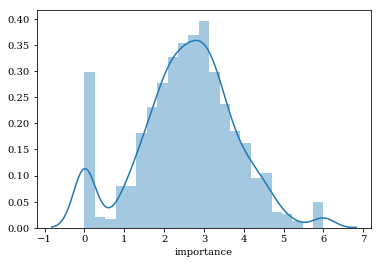

In [57]:


jd['importance'] = jd['pre_match_home_ppg'] + jd['pre_match_away_ppg']

sns.distplot(jd['importance'])

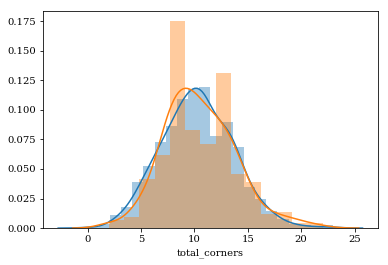

In [59]:
jd['total_corners'] = jd['team_a_corners'] + jd['team_b_corners'] 
home_win = jd[jd.homeID == jd.winningTeam] # away loses
home_lose = jd[jd.homeID != jd.winningTeam] #away wins
jd['total_corners'] = jd['team_a_corners'] + jd['team_b_corners'] 
#sns.distplot(jd['total_corners'])

split1 = jd[(jd['importance'] >= 2)]
split2 = jd[~(jd['importance'] >= 2)]

sns.distplot(split1['total_corners'])
sns.distplot(split2['total_corners'])

### Length of words in greeting

In [3]:
greeting = "Hello Jupyter!"

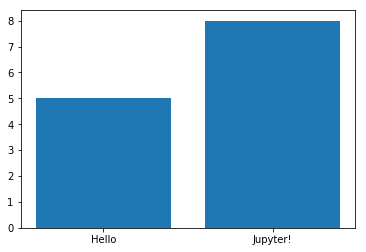

In [4]:
words = greeting.split(' ')
word_length = [len(w) for w in words]
plt.bar(words,word_length)
plt.show()

### Magics

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 22.7 ms, sys: 2.35 ms, total: 25.1 ms
Wall time: 28.5 ms


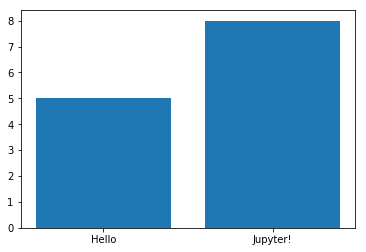

CPU times: user 77.7 ms, sys: 3.13 ms, total: 80.8 ms
Wall time: 95.2 ms


In [11]:
%time word_length = [len(w) for w in words]
%time plt.bar(words,word_length)
%time plt.show()

In [12]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%